### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import re

In [2]:
#To supress warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Changing settings to see maximum data

pd.set_option('display.max_columns', 3000)
pd.set_option('display.expand_frame_repr', 3000)
pd.set_option('max_colwidth', 3000)

### Importing the SKLearn Library

In [4]:
# Importing SKLearn Library

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

### Importing StatsModel Library

In [6]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing SMOTE

In [7]:
from imblearn.over_sampling import SMOTE

### Importing libraries for Cross Validation

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Import PCA

In [9]:
# Importing PCA
from sklearn.decomposition import PCA

# Importing incremental PCA

from sklearn.decomposition import IncrementalPCA

## Step 1: Reading the Dataset and Initial Understanding

In [10]:
telecom_churndata_raw = pd.read_csv(r"C:\Users\heyit\Desktop\Jupyter Notebooks\UpGrad\Assignments\Telecom Case Study\Datasets\telecom_churn_data.csv")

In [11]:
#Checking the first few rows of the data

telecom_churndata_raw.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [12]:
#Checking the shape of the dataset

telecom_churndata_raw.shape

(99999, 226)

In [13]:
#Checking the datatypes of the columns

telecom_churndata_raw.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [14]:
#Checking the summary of the dataset

telecom_churndata_raw.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### *Inference: The following columns just have a singular value. Hence, since these columns have less variance, we will be not be considering them*
 
["circle_id", "loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_og_t2c_mou_6", "std_og_t2c_mou_7", 
 "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"]

## Step 2: Dataset Cleaning and Dataset Transformation before EDA 

In [15]:
# Dropping the columns that have no variance

no_variance_cols = ["circle_id", "loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou", "std_og_t2c_mou_6", "std_og_t2c_mou_7", 
                    "std_og_t2c_mou_8", "std_og_t2c_mou_9", "std_ic_t2o_mou_6", "std_ic_t2o_mou_7", "std_ic_t2o_mou_8", "std_ic_t2o_mou_9"]

telecom_churndata_raw = telecom_churndata_raw.drop(no_variance_cols, axis=1)

In [16]:
# Changing column names for better understanding
# If column had "6" in it, then the column will be renamed with "june"; if it had "7" in it, then "july" ... and so on

telecom_churndata_raw.columns = [re.sub(r'6', 'june', re.sub(r'7', 'july', re.sub(r'8', 'august', re.sub(r'9', 'september', col)))) for col in telecom_churndata_raw.columns]

In [17]:
#Checking percentage of missing/null values

round(100*(telecom_churndata_raw.isnull().sum()/len(telecom_churndata_raw)),2).sort_values(ascending=False)

arpu_3g_june                   74.85
av_rech_amt_data_june          74.85
fb_user_june                   74.85
night_pck_user_june            74.85
date_of_last_rech_data_june    74.85
                               ...  
max_rech_amt_july               0.00
max_rech_amt_june               0.00
total_rech_amt_september        0.00
total_rech_amt_august           0.00
sep_vbc_3g                      0.00
Length: 214, dtype: float64

In [18]:
# Forming a list of columns for which the missing value % is more than 30%

null_30p_cols = telecom_churndata_raw.columns[100*(telecom_churndata_raw.isnull().sum()/len(telecom_churndata_raw)) > 30]
print(null_30p_cols)

Index(['date_of_last_rech_data_june', 'date_of_last_rech_data_july',
       'date_of_last_rech_data_august', 'date_of_last_rech_data_september',
       'total_rech_data_june', 'total_rech_data_july',
       'total_rech_data_august', 'total_rech_data_september',
       'max_rech_data_june', 'max_rech_data_july', 'max_rech_data_august',
       'max_rech_data_september', 'count_rech_2g_june', 'count_rech_2g_july',
       'count_rech_2g_august', 'count_rech_2g_september', 'count_rech_3g_june',
       'count_rech_3g_july', 'count_rech_3g_august', 'count_rech_3g_september',
       'av_rech_amt_data_june', 'av_rech_amt_data_july',
       'av_rech_amt_data_august', 'av_rech_amt_data_september', 'arpu_3g_june',
       'arpu_3g_july', 'arpu_3g_august', 'arpu_3g_september', 'arpu_2g_june',
       'arpu_2g_july', 'arpu_2g_august', 'arpu_2g_september',
       'night_pck_user_june', 'night_pck_user_july', 'night_pck_user_august',
       'night_pck_user_september', 'fb_user_june', 'fb_user_july',
   

In [19]:
null_30p_cols.shape

(40,)

In [20]:
# Dropping the columns that have more than 30% missing values

df_30p_removed = telecom_churndata_raw.drop(null_30p_cols, axis=1)

In [21]:
#Checking shape of the dataframe

df_30p_removed.shape

(99999, 174)

In [22]:
#Creating a new dataset from "df_30p_removed" to check for duplicates

df_telecom_30p_dup_check = df_30p_removed

In [23]:
#Dropping duplicates

df_telecom_30p_dup_check.drop_duplicates().shape

(99999, 174)

In [24]:
#Comparing if the shape of the new dataset after removing the duplicates is the sames as that of the "df_30p_removed"

df_telecom_30p_dup_check.drop_duplicates().shape == df_30p_removed.shape

True

#### *Inference: As the shape of the dataset remains same after dropping duplicates, it means that there are no duplicate rows present in dataset.*

In [25]:
cols_list = list(df_telecom_30p_dup_check.columns)

In [26]:
cols_list

['mobile_number',
 'last_date_of_month_june',
 'last_date_of_month_july',
 'last_date_of_month_august',
 'last_date_of_month_september',
 'arpu_june',
 'arpu_july',
 'arpu_august',
 'arpu_september',
 'onnet_mou_june',
 'onnet_mou_july',
 'onnet_mou_august',
 'onnet_mou_september',
 'offnet_mou_june',
 'offnet_mou_july',
 'offnet_mou_august',
 'offnet_mou_september',
 'roam_ic_mou_june',
 'roam_ic_mou_july',
 'roam_ic_mou_august',
 'roam_ic_mou_september',
 'roam_og_mou_june',
 'roam_og_mou_july',
 'roam_og_mou_august',
 'roam_og_mou_september',
 'loc_og_t2t_mou_june',
 'loc_og_t2t_mou_july',
 'loc_og_t2t_mou_august',
 'loc_og_t2t_mou_september',
 'loc_og_t2m_mou_june',
 'loc_og_t2m_mou_july',
 'loc_og_t2m_mou_august',
 'loc_og_t2m_mou_september',
 'loc_og_t2f_mou_june',
 'loc_og_t2f_mou_july',
 'loc_og_t2f_mou_august',
 'loc_og_t2f_mou_september',
 'loc_og_t2c_mou_june',
 'loc_og_t2c_mou_july',
 'loc_og_t2c_mou_august',
 'loc_og_t2c_mou_september',
 'loc_og_mou_june',
 'loc_og_mou_jul

In [27]:
# Dropping "date" columns for "june" to "september" since we wouldn't be needing them

date_cols = [i for i in df_telecom_30p_dup_check.columns.to_list() if 'date' in i]
print(date_cols) 

['last_date_of_month_june', 'last_date_of_month_july', 'last_date_of_month_august', 'last_date_of_month_september', 'date_of_last_rech_june', 'date_of_last_rech_july', 'date_of_last_rech_august', 'date_of_last_rech_september']


In [28]:
# Dropping the columns that have "date" in their names

df_date_col_removed = df_telecom_30p_dup_check.drop(date_cols, axis=1)

In [29]:
# Checking the shape of the dataframe

df_date_col_removed.shape

(99999, 166)

## Step 2: Data Preparation

#### *Instruction: As instructed in the problem statement, we need to predict churn only for the high-value customersneed to predict churn only for the high-value customers.*

#### Defining high-value customer-

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [30]:
### Creating "high-value" customers in the following way-

# Creating average column by taking the average of "total_rech_amt_june" and "total_rech_amt_july" columns

df_date_col_removed["avg_recharge_amt_june_july"] = (df_date_col_removed["total_rech_amt_june"] + 
                                                     df_date_col_removed["total_rech_amt_july"]) / 2



# Finding 70th Percentile of the "avg_recharge_amt_june_july" columns

perc_70 = df_date_col_removed["avg_recharge_amt_june_july"].quantile(0.7)
print("70th Percentile value is: ", perc_70)


# Filtering for customers who have recharged more than or equal to 70th Percentile

df_hval_cust = df_date_col_removed[df_date_col_removed["avg_recharge_amt_june_july"] >= perc_70]

70th Percentile value is:  368.5


In [31]:
# Checking the shape of the dataframe

df_hval_cust.shape

(30011, 167)

#### As mentioned in the problem statement, we should get about 29.9k rows after filtering for the "high-value" customers.

As we have got **30k records (~ 29.9k)** after the desired filters, we can proceed further!

In [32]:
#Checking percentage of missing/null values

round(100*(df_hval_cust.isnull().sum()/len(df_hval_cust)),2).sort_values(ascending=False)

og_others_september           5.68
roam_ic_mou_september         5.68
loc_og_t2f_mou_september      5.68
loc_og_t2m_mou_september      5.68
isd_og_mou_september          5.68
                              ... 
max_rech_amt_august           0.00
max_rech_amt_september        0.00
last_day_rch_amt_june         0.00
last_day_rch_amt_july         0.00
avg_recharge_amt_june_july    0.00
Length: 167, dtype: float64

#### Null values imputation approach:

Check the data dictionary provided and see if the null values can be imputed with 0 or not.

In [33]:
# Calculating the null values percentage

round(100*(df_hval_cust.isnull().sum()/len(df_hval_cust)), 2)

mobile_number                 0.0
arpu_june                     0.0
arpu_july                     0.0
arpu_august                   0.0
arpu_september                0.0
                             ... 
aug_vbc_3g                    0.0
jul_vbc_3g                    0.0
jun_vbc_3g                    0.0
sep_vbc_3g                    0.0
avg_recharge_amt_june_july    0.0
Length: 167, dtype: float64

In [34]:
# Replacing the null values with 0 in the entire dataframe

df_hval_imput = df_hval_cust.copy()

df_hval_imput.fillna(0, inplace= True)

In [35]:
#Checking if there any missing/null values in the dataset now

null_values_perc = round(100*(df_hval_imput.isnull().sum()/len(df_hval_imput)),2).sort_values(ascending=False)

null_values_cols = null_values_perc[null_values_perc > 0].sort_values(ascending=False)

In [36]:
print(null_values_cols)

Series([], dtype: float64)


#### *Inference: All null values in the dataset have been imputed.*

In [37]:
# Checking the shape of the dataframe

df_hval_imput.shape

(30011, 167)

### a) Deriving new features:

Deriving new features that could be probable indicators of churn.

In [38]:
# Creating a new variable called "connection_tenure" using the "AON" variable

df_hval_imput["connection_tenure"] = (df_hval_imput["aon"]/30).round(0)

# Dropping the "AON" columns

df_aon_drop = df_hval_imput.drop("aon", axis = 1)

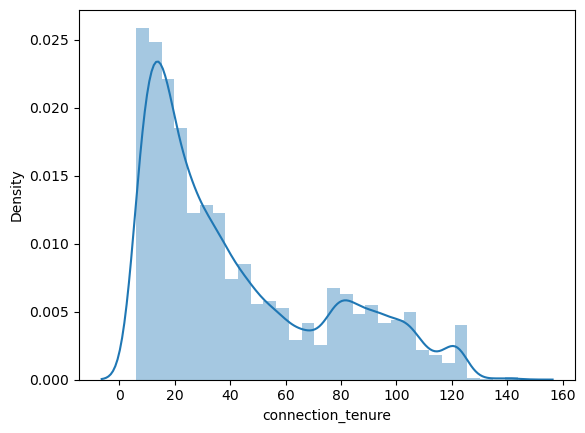

In [39]:
# Checking the distribution of the "connection_tenure" variable to create groups

sns.distplot(df_aon_drop["connection_tenure"],bins=30)
plt.show()

In [40]:
# Creating range and group tags for "connection_tenure"

tenure_range = [0, 6, 12, 24, 60, 150]
tenure_tag = [ "0-6 Months", "6-12 Months", "1-2 Yrs", "2-5 Yrs", "5 Yrs and Above"]

df_aon_drop["tenure_duration"] = pd.cut(x = df_aon_drop["connection_tenure"], bins = tenure_range, labels = tenure_tag)

In [41]:
# Checking the shape of the dataframe

df_aon_drop.shape

(30011, 168)

In [42]:
""" Creating a new variable called "flag_dec_rech_amt_action" which will flag if the recharge amount has decreased 
in the "Action Phase" when compared with the "Good Phase" or not """

#  Difference of average rech_amt in "Action Phase" and "Good Phase"

df_aon_drop["avg_rech_amt_good_phase"] = (df_aon_drop["total_rech_amt_june"] + df_aon_drop["total_rech_amt_july"]) / 2

df_aon_drop['diff_rech_amt'] = df_aon_drop['total_rech_amt_august'] - df_aon_drop["avg_rech_amt_good_phase"]


# Checking if rech_amt has decreased in "Action Phase"

df_aon_drop['flag_dec_rech_amt_action'] = np.where((df_aon_drop['diff_rech_amt'] < 0), 1, 0)

In [43]:
df_aon_drop[df_aon_drop["flag_dec_rech_amt_action"] == 1]

,mobile_number,arpu_june,arpu_july,arpu_august,arpu_september,onnet_mou_june,onnet_mou_july,onnet_mou_august,onnet_mou_september,offnet_mou_june,offnet_mou_july,offnet_mou_august,offnet_mou_september,roam_ic_mou_june,roam_ic_mou_july,roam_ic_mou_august,roam_ic_mou_september,roam_og_mou_june,roam_og_mou_july,roam_og_mou_august,roam_og_mou_september,loc_og_t2t_mou_june,loc_og_t2t_mou_july,loc_og_t2t_mou_august,loc_og_t2t_mou_september,loc_og_t2m_mou_june,loc_og_t2m_mou_july,loc_og_t2m_mou_august,loc_og_t2m_mou_september,loc_og_t2f_mou_june,loc_og_t2f_mou_july,loc_og_t2f_mou_august,loc_og_t2f_mou_september,loc_og_t2c_mou_june,loc_og_t2c_mou_july,loc_og_t2c_mou_august,loc_og_t2c_mou_september,loc_og_mou_june,loc_og_mou_july,loc_og_mou_august,loc_og_mou_september,std_og_t2t_mou_june,std_og_t2t_mou_july,std_og_t2t_mou_august,std_og_t2t_mou_september,std_og_t2m_mou_june,std_og_t2m_mou_july,std_og_t2m_mou_august,std_og_t2m_mou_september,std_og_t2f_mou_june,std_og_t2f_mou_july,std_og_t2f_mou_august,std_og_t2f_mou_september,std_og_mou_june,std_og_mou_july,std_og_mou_august,std_og_mou_september,isd_og_mou_june,isd_og_mou_july,isd_og_mou_august,isd_og_mou_september,spl_og_mou_june,spl_og_mou_july,spl_og_mou_august,spl_og_mou_september,og_others_june,og_others_july,og_others_august,og_others_september,total_og_mou_june,total_og_mou_july,total_og_mou_august,total_og_mou_september,loc_ic_t2t_mou_june,loc_ic_t2t_mou_july,loc_ic_t2t_mou_august,loc_ic_t2t_mou_september,loc_ic_t2m_mou_june,loc_ic_t2m_mou_july,loc_ic_t2m_mou_august,loc_ic_t2m_mou_september,loc_ic_t2f_mou_june,loc_ic_t2f_mou_july,loc_ic_t2f_mou_august,loc_ic_t2f_mou_september,loc_ic_mou_june,loc_ic_mou_july,loc_ic_mou_august,loc_ic_mou_september,std_ic_t2t_mou_june,std_ic_t2t_mou_july,std_ic_t2t_mou_august,std_ic_t2t_mou_september,std_ic_t2m_mou_june,std_ic_t2m_mou_july,std_ic_t2m_mou_august,std_ic_t2m_mou_september,std_ic_t2f_mou_june,std_ic_t2f_mou_july,std_ic_t2f_mou_august,std_ic_t2f_mou_september,std_ic_mou_june,std_ic_mou_july,std_ic_mou_august,std_ic_mou_september,total_ic_mou_june,total_ic_mou_july,total_ic_mou_august,total_ic_mou_september,spl_ic_mou_june,spl_ic_mou_july,spl_ic_mou_august,spl_ic_mou_september,isd_ic_mou_june,isd_ic_mou_july,isd_ic_mou_august,isd_ic_mou_september,ic_others_june,ic_others_july,ic_others_august,ic_others_september,total_rech_num_june,total_rech_num_july,total_rech_num_august,total_rech_num_september,total_rech_amt_june,total_rech_amt_july,total_rech_amt_august,total_rech_amt_september,max_rech_amt_june,max_rech_amt_july,max_rech_amt_august,max_rech_amt_september,last_day_rch_amt_june,last_day_rch_amt_july,last_day_rch_amt_august,last_day_rch_amt_september,vol_2g_mb_june,vol_2g_mb_july,vol_2g_mb_august,vol_2g_mb_september,vol_3g_mb_june,vol_3g_mb_july,vol_3g_mb_august,vol_3g_mb_september,monthly_2g_june,monthly_2g_july,monthly_2g_august,monthly_2g_september,sachet_2g_june,sachet_2g_july,sachet_2g_august,sachet_2g_september,monthly_3g_june,monthly_3g_july,monthly_3g_august,monthly_3g_september,sachet_3g_june,sachet_3g_july,sachet_3g_august,sachet_3g_september,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_june_july,connection_tenure,tenure_duration,avg_rech_amt_good_phase,diff_rech_amt,flag_dec_rech_amt_action
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.0,0.00,130.26,143.48,98.28,81.46,0.00,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0

### b) Tagging Churners:

Now tagging the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes used to tag churners are:

- total_ic_mou_september
- total_og_mou_september
- vol_2g_mb_september
- vol_3g_mb_september

In [44]:
# Creating the "churn" variable

df_aon_drop["Churn_Flag"] = (np.where((df_aon_drop["total_ic_mou_september"]==0) & (df_aon_drop["total_og_mou_september"]==0) 
                                 & (df_aon_drop["vol_2g_mb_september"]==0) & (df_aon_drop["vol_3g_mb_september"]==0), 1, 0))

In [45]:
# Checking a few rows of the dataset

df_aon_drop.head()

,mobile_number,arpu_june,arpu_july,arpu_august,arpu_september,onnet_mou_june,onnet_mou_july,onnet_mou_august,onnet_mou_september,offnet_mou_june,offnet_mou_july,offnet_mou_august,offnet_mou_september,roam_ic_mou_june,roam_ic_mou_july,roam_ic_mou_august,roam_ic_mou_september,roam_og_mou_june,roam_og_mou_july,roam_og_mou_august,roam_og_mou_september,loc_og_t2t_mou_june,loc_og_t2t_mou_july,loc_og_t2t_mou_august,loc_og_t2t_mou_september,loc_og_t2m_mou_june,loc_og_t2m_mou_july,loc_og_t2m_mou_august,loc_og_t2m_mou_september,loc_og_t2f_mou_june,loc_og_t2f_mou_july,loc_og_t2f_mou_august,loc_og_t2f_mou_september,loc_og_t2c_mou_june,loc_og_t2c_mou_july,loc_og_t2c_mou_august,loc_og_t2c_mou_september,loc_og_mou_june,loc_og_mou_july,loc_og_mou_august,loc_og_mou_september,std_og_t2t_mou_june,std_og_t2t_mou_july,std_og_t2t_mou_august,std_og_t2t_mou_september,std_og_t2m_mou_june,std_og_t2m_mou_july,std_og_t2m_mou_august,std_og_t2m_mou_september,std_og_t2f_mou_june,std_og_t2f_mou_july,std_og_t2f_mou_august,std_og_t2f_mou_september,std_og_mou_june,std_og_mou_july,std_og_mou_august,std_og_mou_september,isd_og_mou_june,isd_og_mou_july,isd_og_mou_august,isd_og_mou_september,spl_og_mou_june,spl_og_mou_july,spl_og_mou_august,spl_og_mou_september,og_others_june,og_others_july,og_others_august,og_others_september,total_og_mou_june,total_og_mou_july,total_og_mou_august,total_og_mou_september,loc_ic_t2t_mou_june,loc_ic_t2t_mou_july,loc_ic_t2t_mou_august,loc_ic_t2t_mou_september,loc_ic_t2m_mou_june,loc_ic_t2m_mou_july,loc_ic_t2m_mou_august,loc_ic_t2m_mou_september,loc_ic_t2f_mou_june,loc_ic_t2f_mou_july,loc_ic_t2f_mou_august,loc_ic_t2f_mou_september,loc_ic_mou_june,loc_ic_mou_july,loc_ic_mou_august,loc_ic_mou_september,std_ic_t2t_mou_june,std_ic_t2t_mou_july,std_ic_t2t_mou_august,std_ic_t2t_mou_september,std_ic_t2m_mou_june,std_ic_t2m_mou_july,std_ic_t2m_mou_august,std_ic_t2m_mou_september,std_ic_t2f_mou_june,std_ic_t2f_mou_july,std_ic_t2f_mou_august,std_ic_t2f_mou_september,std_ic_mou_june,std_ic_mou_july,std_ic_mou_august,std_ic_mou_september,total_ic_mou_june,total_ic_mou_july,total_ic_mou_august,total_ic_mou_september,spl_ic_mou_june,spl_ic_mou_july,spl_ic_mou_august,spl_ic_mou_september,isd_ic_mou_june,isd_ic_mou_july,isd_ic_mou_august,isd_ic_mou_september,ic_others_june,ic_others_july,ic_others_august,ic_others_september,total_rech_num_june,total_rech_num_july,total_rech_num_august,total_rech_num_september,total_rech_amt_june,total_rech_amt_july,total_rech_amt_august,total_rech_amt_september,max_rech_amt_june,max_rech_amt_july,max_rech_amt_august,max_rech_amt_september,last_day_rch_amt_june,last_day_rch_amt_july,last_day_rch_amt_august,last_day_rch_amt_september,vol_2g_mb_june,vol_2g_mb_july,vol_2g_mb_august,vol_2g_mb_september,vol_3g_mb_june,vol_3g_mb_july,vol_3g_mb_august,vol_3g_mb_september,monthly_2g_june,monthly_2g_july,monthly_2g_august,monthly_2g_september,sachet_2g_june,sachet_2g_july,sachet_2g_august,sachet_2g_september,monthly_3g_june,monthly_3g_july,monthly_3g_august,monthly_3g_september,sachet_3g_june,sachet_3g_july,sachet_3g_august,sachet_3g_september,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_june_july,connection_tenure,tenure_duration,avg_rech_amt_good_phase,diff_rech_amt,flag_dec_rech_amt_action,Churn_Flag
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,

#### As mentioned in the problem statement, we should remove all the attributes corresponding to the "Churn Phase" after tagging the churners.

#### Removing all the columns of the "Churn Phase"

In [46]:
# All the columns that have "September" in them are going to be dropped from the dataset

sept_cols = [col for col in df_aon_drop.columns.to_list() if 'september' in col]
sept_cols.append("sep_vbc_3g")
print(sept_cols)

['arpu_september', 'onnet_mou_september', 'offnet_mou_september', 'roam_ic_mou_september', 'roam_og_mou_september', 'loc_og_t2t_mou_september', 'loc_og_t2m_mou_september', 'loc_og_t2f_mou_september', 'loc_og_t2c_mou_september', 'loc_og_mou_september', 'std_og_t2t_mou_september', 'std_og_t2m_mou_september', 'std_og_t2f_mou_september', 'std_og_mou_september', 'isd_og_mou_september', 'spl_og_mou_september', 'og_others_september', 'total_og_mou_september', 'loc_ic_t2t_mou_september', 'loc_ic_t2m_mou_september', 'loc_ic_t2f_mou_september', 'loc_ic_mou_september', 'std_ic_t2t_mou_september', 'std_ic_t2m_mou_september', 'std_ic_t2f_mou_september', 'std_ic_mou_september', 'total_ic_mou_september', 'spl_ic_mou_september', 'isd_ic_mou_september', 'ic_others_september', 'total_rech_num_september', 'total_rech_amt_september', 'max_rech_amt_september', 'last_day_rch_amt_september', 'vol_2g_mb_september', 'vol_3g_mb_september', 'monthly_2g_september', 'sachet_2g_september', 'monthly_3g_september', '

In [47]:
# Dropping the "sept_cols"

df_sep_drop = df_aon_drop.drop(sept_cols, axis = 1)

In [48]:
# Checking the shape of the dataframe

df_sep_drop.shape

(30011, 131)

In [49]:
# Calculating the Churn rate:-

ChurnRate = (sum(df_sep_drop["Churn_Flag"])/len(df_sep_drop["Churn_Flag"].index))*100
ChurnRate

8.64016527273333

#### *Inference: Since the above Churn Rate % is very less, we have a class imbalance problem which we will handle later, post the EDA.*

## Step 3: Data Visualization and EDA

#### Target Column : "Churn_Flag"

The target variable is "Churn_Flag" which indicates whether a customer has churned or not.

    0: Customer has not churned.
    1: Customer has churned.

### a) Univariate Analysis

#### i) Plot for Categ Variable: "tenure_duration"

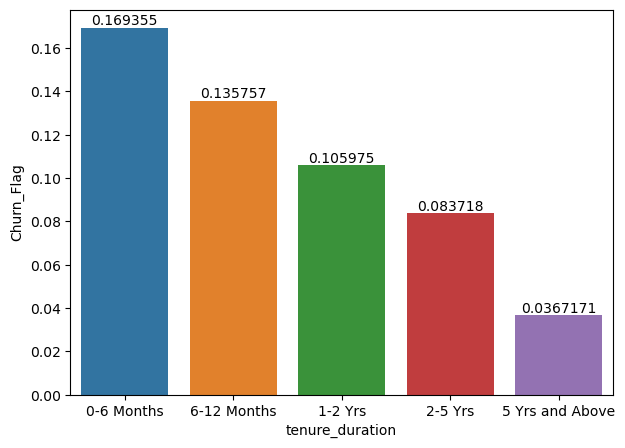

In [50]:
# Plotting a bar plot for "tenure_duration"

plt.figure(figsize=[7, 5])
ax = sns.barplot(x = "tenure_duration", y = "Churn_Flag", data = df_sep_drop, ci = None)
ax.bar_label(ax.containers[0])
plt.show()

#### *Inference: Maximum churn rate is in the "0-6 Months" tenure duration followed by "6-12 Months". Also, as the tenure duration keeps increasing, the churn rate of the customer keeps decreasing.*

#### ii) Plot for variable: "flag_dec_rech_amt_action"

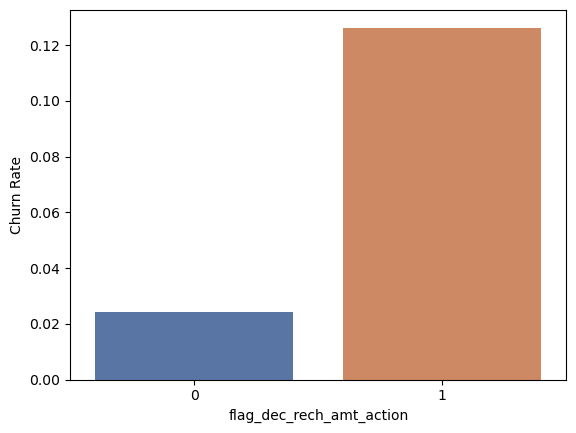

In [51]:
df_pivot = df_sep_drop.pivot_table(values ="Churn_Flag", index ="flag_dec_rech_amt_action", aggfunc = "mean")

# Choose a color palette with enough colors for your bars
colors = sns.color_palette("deep", n_colors = len(df_pivot))

# Use seaborn's barplot function
sns.barplot(x = df_pivot.index, y = df_pivot["Churn_Flag"], palette = colors)

plt.ylabel("Churn Rate")
plt.show()

#### *Inference: Churn rate is higher for those customers whose "total_rech_amt" decreased in "Action Phase" compared to the avergae amount in "Good Phase".*

### b) Bivariate Analysis

#### i) Analysis of the "avg_rech_amt_good_phase" variable in "Churn" and "Non-Churn" phase

In [52]:
# Creating churn dataframe

df_churn = df_sep_drop[df_sep_drop["Churn_Flag"] == 1]


# Creating not churn dataframe

df_non_churn = df_sep_drop[df_sep_drop["Churn_Flag"] == 0]

[Text(0.5, 0, 'Good Phase Average Recharge Amount')]

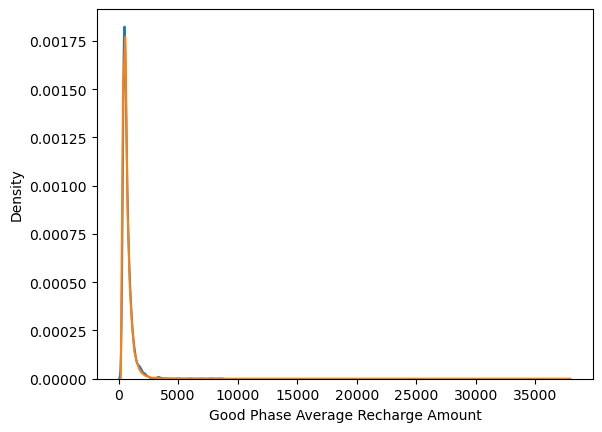

In [53]:
# Plotting the distribution plot

ax = sns.distplot(df_churn['avg_rech_amt_good_phase'], label = 'Churn', hist=False)
ax = sns.distplot(df_non_churn['avg_rech_amt_good_phase'], label = 'Not Churn', hist=False)
ax.set(xlabel = 'Good Phase Average Recharge Amount')

#### *Inference: The concentration of Average Recharge Amount (in Good Phase) among churned customers is predominantly in the range of 0 to 2500. Customers with higher average recharge amount values exhibit a lower likelihood of churning.*

#### ii) Plot for variables: "tenure_duration" and "flag_dec_rech_amt_action"

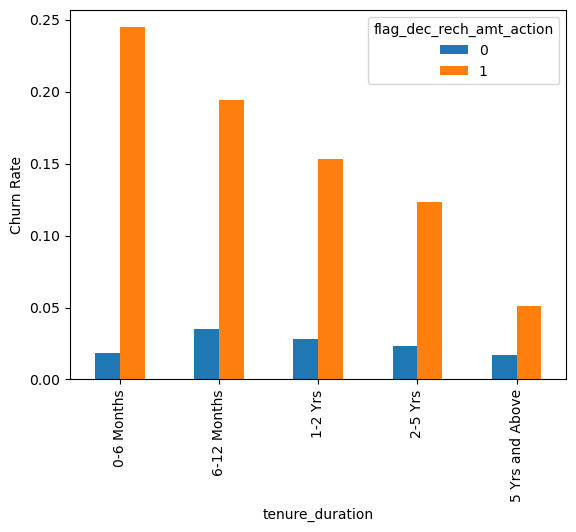

In [54]:
# Plotting the graph

df_sep_drop.pivot_table(values = "Churn_Flag", index = "tenure_duration", columns = "flag_dec_rech_amt_action", aggfunc = "mean").plot.bar()
plt.ylabel("Churn Rate")
plt.show()

#### *Inference: Churn rate is highet for those customers whose "total_rech_amt" decreased in "Action Phase" compared to the avergae amount in "Good Phase" and total tenue was less than 1 year .*

In [55]:
# Dropping the derived columns that aren't required in further analysis

derived_cols = ["tenure_duration", "avg_rech_amt_good_phase", "diff_rech_amt"]
df_preprocessed = df_sep_drop.drop(derived_cols, axis = 1)

In [56]:
# Checking the shape of the dataframe

df_preprocessed.shape

(30011, 128)

## Step 4: Preparing Data for Model Building

In [57]:
# Checking "Categorical" / "Object" type variables in the dataset

categorical_cols = df_preprocessed.select_dtypes(include=["object", "category"]).columns.tolist()
categorical_cols

[]

#### *Inference: Since there are no categorical/object columns, we don't need to create dummy variables.*

In [58]:
# Putting feature variables into X

X = df_preprocessed.drop(["mobile_number", "Churn_Flag"], axis=1)

# Putting target variable to y

y = df_preprocessed["Churn_Flag"]

In [59]:
# Splitting data into train and test set on the basis of 80-20 rule

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

### *a) Dealing with Data Imbalance: Using SMOTE*

In [60]:
# Instantiating SMOTE

smote = SMOTE(random_state = 100)

# Fitting SMOTE to the train set datasets

X_train, y_train = smote.fit_resample(X_train, y_train)

### *b) Feature Scaling*

In [61]:
# Extracting the XTrain columns

Xtrain_cols = list(X_train.columns)

# Removing derived binary column 

Xtrain_cols.remove("flag_dec_rech_amt_action")

#### *Note: Scaling the Train Dataset using "fit_transform"*

In [62]:
# Instantiating the Scaler

scaler = StandardScaler()

## Scaling the Train Set
# Applying the "fit_transform" to fit the data into scaler and transform as well

X_train[Xtrain_cols] = scaler.fit_transform(X_train[Xtrain_cols])

In [63]:
# Checking the summary of the Train Dataset after scaling

X_train.describe()

,arpu_june,arpu_july,arpu_august,onnet_mou_june,onnet_mou_july,onnet_mou_august,offnet_mou_june,offnet_mou_july,offnet_mou_august,roam_ic_mou_june,roam_ic_mou_july,roam_ic_mou_august,roam_og_mou_june,roam_og_mou_july,roam_og_mou_august,loc_og_t2t_mou_june,loc_og_t2t_mou_july,loc_og_t2t_mou_august,loc_og_t2m_mou_june,loc_og_t2m_mou_july,loc_og_t2m_mou_august,loc_og_t2f_mou_june,loc_og_t2f_mou_july,loc_og_t2f_mou_august,loc_og_t2c_mou_june,loc_og_t2c_mou_july,loc_og_t2c_mou_august,loc_og_mou_june,loc_og_mou_july,loc_og_mou_august,std_og_t2t_mou_june,std_og_t2t_mou_july,std_og_t2t_mou_august,std_og_t2m_mou_june,std_og_t2m_mou_july,std_og_t2m_mou_august,std_og_t2f_mou_june,std_og_t2f_mou_july,std_og_t2f_mou_august,std_og_mou_june,std_og_mou_july,std_og_mou_august,isd_og_mou_june,isd_og_mou_july,isd_og_mou_august,spl_og_mou_june,spl_og_mou_july,spl_og_mou_august,og_others_june,og_others_july,og_others_august,total_og_mou_june,total_og_mou_july,total_og_mou_august,loc_ic_t2t_mou_june,loc_ic_t2t_mou_july,loc_ic_t2t_mou_august,loc_ic_t2m_mou_june,loc_ic_t2m_mou_july,loc_ic_t2m_mou_august,loc_ic_t2f_mou_june,loc_ic_t2f_mou_july,loc_ic_t2f_mou_august,loc_ic_mou_june,loc_ic_mou_july,loc_ic_mou_august,std_ic_t2t_mou_june,std_ic_t2t_mou_july,std_ic_t2t_mou_august,std_ic_t2m_mou_june,std_ic_t2m_mou_july,std_ic_t2m_mou_august,std_ic_t2f_mou_june,std_ic_t2f_mou_july,std_ic_t2f_mou_august,std_ic_mou_june,std_ic_mou_july,std_ic_mou_august,total_ic_mou_june,total_ic_mou_july,total_ic_mou_august,spl_ic_mou_june,spl_ic_mou_july,spl_ic_mou_august,isd_ic_mou_june,isd_ic_mou_july,isd_ic_mou_august,ic_others_june,ic_others_july,ic_others_august,total_rech_num_june,total_rech_num_july,total_rech_num_august,total_rech_amt_june,total_rech_amt_july,total_rech_amt_august,max_rech_amt_june,max_rech_amt_july,max_rech_amt_august,last_day_rch_amt_june,last_day_rch_amt_july,last_day_rch_amt_august,vol_2g_mb_june,vol_2g_mb_july,vol_2g_mb_august,vol_3g_mb_june,vol_3g_mb_july,vol_3g_mb_august,monthly_2g_june,monthly_2g_july,monthly_2g_august,sachet_2g_june,sachet_2g_july,sachet_2g_august,monthly_3g_june,monthly_3g_july,monthly_3g_august,sachet_3g_june,sachet_3g_july,sachet_3g_august,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amt_june_july,connection_tenure,flag_dec_rech_amt_action
count,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,43896.000000,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,4.389600e+04,43896.000000
mean,1.126612e-16,-2.136679e-17,2.589913e-17,1.294957e-16,-2.428044e-

#### *Note: Scaling the Test Dataset using "transform" only as we don't "fit" on the Test Dataset*

In [64]:
# Transform the test set

X_test[Xtrain_cols] = scaler.transform(X_test[Xtrain_cols])

In [65]:
# Checking the summary of the Test Dataset after scaling

X_test.describe()

,arpu_june,arpu_july,arpu_august,onnet_mou_june,onnet_mou_july,onnet_mou_august,offnet_mou_june,offnet_mou_july,offnet_mou_august,roam_ic_mou_june,roam_ic_mou_july,roam_ic_mou_august,roam_og_mou_june,roam_og_mou_july,roam_og_mou_august,loc_og_t2t_mou_june,loc_og_t2t_mou_july,loc_og_t2t_mou_august,loc_og_t2m_mou_june,loc_og_t2m_mou_july,loc_og_t2m_mou_august,loc_og_t2f_mou_june,loc_og_t2f_mou_july,loc_og_t2f_mou_august,loc_og_t2c_mou_june,loc_og_t2c_mou_july,loc_og_t2c_mou_august,loc_og_mou_june,loc_og_mou_july,loc_og_mou_august,std_og_t2t_mou_june,std_og_t2t_mou_july,std_og_t2t_mou_august,std_og_t2m_mou_june,std_og_t2m_mou_july,std_og_t2m_mou_august,std_og_t2f_mou_june,std_og_t2f_mou_july,std_og_t2f_mou_august,std_og_mou_june,std_og_mou_july,std_og_mou_august,isd_og_mou_june,isd_og_mou_july,isd_og_mou_august,spl_og_mou_june,spl_og_mou_july,spl_og_mou_august,og_others_june,og_others_july,og_others_august,total_og_mou_june,total_og_mou_july,total_og_mou_august,loc_ic_t2t_mou_june,loc_ic_t2t_mou_july,loc_ic_t2t_mou_august,loc_ic_t2m_mou_june,loc_ic_t2m_mou_july,loc_ic_t2m_mou_august,loc_ic_t2f_mou_june,loc_ic_t2f_mou_july,loc_ic_t2f_mou_august,loc_ic_mou_june,loc_ic_mou_july,loc_ic_mou_august,std_ic_t2t_mou_june,std_ic_t2t_mou_july,std_ic_t2t_mou_august,std_ic_t2m_mou_june,std_ic_t2m_mou_july,std_ic_t2m_mou_august,std_ic_t2f_mou_june,std_ic_t2f_mou_july,std_ic_t2f_mou_august,std_ic_mou_june,std_ic_mou_july,std_ic_mou_august,total_ic_mou_june,total_ic_mou_july,total_ic_mou_august,spl_ic_mou_june,spl_ic_mou_july,spl_ic_mou_august,isd_ic_mou_june,isd_ic_mou_july,isd_ic_mou_august,ic_others_june,ic_others_july,ic_others_august,total_rech_num_june,total_rech_num_july,total_rech_num_august,total_rech_amt_june,total_rech_amt_july,total_rech_amt_august,max_rech_amt_june,max_rech_amt_july,max_rech_amt_august,last_day_rch_amt_june,last_day_rch_amt_july,last_day_rch_amt_august,vol_2g_mb_june,vol_2g_mb_july,vol_2g_mb_august,vol_3g_mb_june,vol_3g_mb_july,vol_3g_mb_august,monthly_2g_june,monthly_2g_july,monthly_2g_august,sachet_2g_june,sachet_2g_july,sachet_2g_august,monthly_3g_june,monthly_3g_july,monthly_3g_august,sachet_3g_june,sachet_3g_july,sachet_3g_august,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_recharge_amt_june_july,connection_tenure,flag_dec_rech_amt_action
count,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000,6003.000000
mean,-0.063219,0.042954,0.288711,-0.090417,-0.006235,0.151313,-0.042525,0.037046,0.275083,-0.069229,-0.069192,-0.073282,-0.087982,-0.106915,-0.079200,0.071106,0.113095,0.170119,0.119319,0.212656,

## Step 5: Model Building

#### Modelling Approach:

- We will be building multiple models going forward. Initially, we will build models without using PCA.
- Later, we will use PCA to build models
- We will then compare the above models on the basis of the desired metrics and choose the model which is easier to interpret i.e., A model which captures the trends in the data and is easy to interpret at the same time.

### a) Modelling without PCA

#### Model- Logistic Regression (Using RFE)

#### Feature selection using RFE

In [66]:
# Instantiating an object using "LogisticRegression()"

logreg = LogisticRegression()

In [67]:
# Running RFE with 15 variables

rfe = RFE(logreg, n_features_to_select = 15)

rfe = rfe.fit(X_train, y_train)

In [68]:
# Features selected

rfe_selected_cols = X_train.columns[rfe.support_]
rfe_selected_cols

Index(['arpu_july', 'loc_og_mou_august', 'loc_ic_t2m_mou_july',
       'loc_ic_mou_august', 'total_ic_mou_august', 'total_rech_num_july',
       'total_rech_num_august', 'total_rech_amt_july', 'total_rech_amt_august',
       'last_day_rch_amt_august', 'monthly_2g_june', 'monthly_2g_august',
       'monthly_3g_august', 'avg_recharge_amt_june_july',
       'flag_dec_rech_amt_action'],
      dtype='object')

#### Assessing the models

#### Creating a few functions that can be used to assess the models repetitively

In [69]:
# Function for building the model

def build_log_reg_model(X,y):
    X_sm = sm.add_constant(X)    
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()   
    print(logm.summary())  
    return X_sm, logm

In [70]:
# Function to calculate Variance Inflation Factor (VIF)

def check_VIF(X_in):
    X = X_in.drop('const', axis = 1) 
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [71]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_pred})
    y_train_pred_final['CustomerID'] = y_train.index
    
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)
    
    return y_train_pred_final

In [72]:
# Function to get confusion matrix and accuracy (Train Dataset)

def conf_mat_train(Churn_var,predicted):
    confusion = metrics.confusion_matrix(Churn_var, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Churn_var, predicted))
    return confusion

In [73]:
# Function to get confusion matrix and accuracy (Test Dataset)

def conf_mat_test(Churn_var,predicted):
    confusion = metrics.confusion_matrix(Churn_var, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Testing Accuracy: ", metrics.accuracy_score(Churn_var, predicted))
    return confusion

In [74]:
# Function for calculating metric beyond accuracy

def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - Predicting the Churn when the customer hasn't actually Churned: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

#### Building a LogisticRegression Model (Without PCA)  ||  Model Iteration 1

In [75]:
X1, logm1 = build_log_reg_model(X_train[rfe_selected_cols], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Churn_Flag   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43880
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17792.
Date:                Tue, 09 Jan 2024   Deviance:                       35584.
Time:                        21:07:00   Pearson chi2:                 9.10e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4377
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Inferences-

- Since all columns have p-values less than 0.05, we will use VIF scores to drop variables having value more than 5.

In [76]:
#Checking VIF for Model Iteration 1

check_VIF(X1)

,Features,VIF
0,arpu_july,11.92
7,total_rech_amt_july,10.64
3,loc_ic_mou_august,6.94
4,total_ic_mou_august,5.78
13,avg_recharge_amt_june_july,4.66
8,total_rech_amt_august,3.98
6,total_rech_num_august,2.95
5,total_rech_num_july,2.41
2,loc_ic_t2m_mou_july,1.92
1,loc_og_mou_august,1.54


#### Inferences-
- Dropping the variables that have a higher VIF value (> 5) - "arpu_july" and "total_rech_amt_july"

#### Building a LogisticRegression Model (Without PCA)  ||  Model Iteration 2

In [77]:
rfe_lg_second_iter = rfe_selected_cols.drop(["arpu_july", "total_rech_amt_july"])

# To rebuild the model
X2, logm2 = build_log_reg_model(X_train[rfe_lg_second_iter], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Churn_Flag   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43882
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17841.
Date:                Tue, 09 Jan 2024   Deviance:                       35682.
Time:                        21:07:01   Pearson chi2:                 7.26e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4364
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Inferences-

- Since all columns have p-values less than 0.05, we will use VIF scores to drop variables having value more than 5.

In [78]:
#Checking VIF for Model Iteration 2

check_VIF(X2)

,Features,VIF
2,loc_ic_mou_august,6.93
3,total_ic_mou_august,5.76
6,total_rech_amt_august,3.69
5,total_rech_num_august,2.87
4,total_rech_num_july,2.15
11,avg_recharge_amt_june_july,2.13
1,loc_ic_t2m_mou_july,1.92
0,loc_og_mou_august,1.54
7,last_day_rch_amt_august,1.46
9,monthly_2g_august,1.41


#### Inferences- 
- Dropping the variable that has a higher VIF value (> 5) - "loc_ic_mou_august"

#### Building a LogisticRegression Model (Without PCA)  ||  Model Iteration 3

In [79]:
rfe_lg_third_iter = rfe_lg_second_iter.drop(["loc_ic_mou_august"])

# To rebuild the model
X3, logm3 = build_log_reg_model(X_train[rfe_lg_third_iter], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Churn_Flag   No. Observations:                43896
Model:                            GLM   Df Residuals:                    43883
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17905.
Date:                Tue, 09 Jan 2024   Deviance:                       35811.
Time:                        21:07:02   Pearson chi2:                 9.17e+08
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4347
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Inferences-

- Since all columns have p-values less than 0.05, we will use VIF scores to drop variables having value more than 5.

In [80]:
#Checking VIF for Model Iteration 3

check_VIF(X3)

,Features,VIF
5,total_rech_amt_august,3.68
4,total_rech_num_august,2.86
3,total_rech_num_july,2.15
10,avg_recharge_amt_june_july,2.13
2,total_ic_mou_august,1.97
1,loc_ic_t2m_mou_july,1.67
0,loc_og_mou_august,1.46
6,last_day_rch_amt_august,1.46
8,monthly_2g_august,1.41
7,monthly_2g_june,1.38


#### Inferences-

- All variables have low p-values (<0.05). Hence, all the columns are significant now.
- VIF score of all variables is < 5 indicating that there is no multicollinearity present.
- We can use Model Iteration-3 to predict on the Test Set now.

In [81]:
# To get predicted values on train set

y_train_pred_final = get_pred(X3, logm3)
y_train_pred_final.head()

,Churn,Churn_prob,CustomerID,predicted
0,0,0.109698,0,0
1,0,0.067954,1,0
2,0,0.026210,2,0
3,0,0.011775,3,0
4,0,0.788141,4,1


In [82]:
# Confusion Matrix and accuracy

confusion_matrix_log_reg_no_pca = conf_mat_train(y_train_pred_final.Churn, y_train_pred_final.predicted)

Confusion Matrix:
[[17567  4381]
 [ 3098 18850]]
Training Accuracy:  0.8296200109349371


#### Inferences-

- Model Number 3 (Without PCA) is the model we have selected because of the following reasons-

    - All variables have low p-values (<0.05). Hence, all the columns are significant now.
    - VIF score of all variables is < 5 indicating that there is no multicollinearity present.
    - Training accuracy of 82.96%

#### Plotting the ROC Curve and Checking Accuracy

In [83]:
#Accuracy

other_metrics(confusion_matrix_log_reg_no_pca)

Sensitivity:  0.858848186622927
Specificity:  0.8003918352469473
False postive rate - Predicting the Churn when the customer hasn't actually Churned:  0.19960816475305268
Positive predictive value:  0.8114157806379407
Negative predictive value:  0.8500846842487297


In [84]:
# Plotting the ROC Curve

# Function to plot ROC
def roc_plot(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob, drop_intermediate = False)

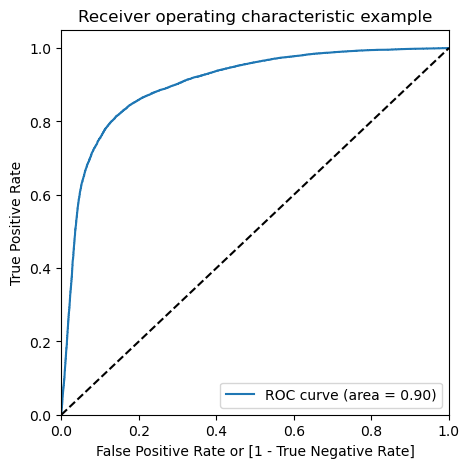

In [86]:
# Plotting ROC Curve

roc_plot(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

In [87]:
print("Area under curve: ", metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.Churn_prob))

Area under curve:  0.9031611696453427


#### Inferences-

- Area under curve (auc) is approximately 0.90; close to ideal auc of 1

In [88]:
# Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_prob,CustomerID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.109698,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0.067954,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.026210,2,0,1,0,0,0,0,0,0,0,0,0
3,0,0.011775,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.788141,4,1,1,1,1,1,1,1,1,1,0,0


In [89]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame(columns = ['Probability','Accuracy', 'Sensitivity', 'Specificity'])

# TP = confusion[1,1]    # True positive 
# TN = confusion[0,0]    # True negatives
# FP = confusion[0,1]    # False positives
# FN = confusion[1,0]    # False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.692592     0.976672     0.408511
0.2          0.2  0.746606     0.952934     0.540277
0.3          0.3  0.781780     0.925415     0.638145
0.4          0.4  0.807910     0.893612     0.722207
0.5          0.5  0.829620     0.858848     0.800392
0.6          0.6  0.835406     0.802807     0.868006
0.7          0.7  0.818845     0.718881     0.918808
0.8          0.8  0.772986     0.591717     0.954256
0.9          0.9  0.601991     0.219291     0.984691


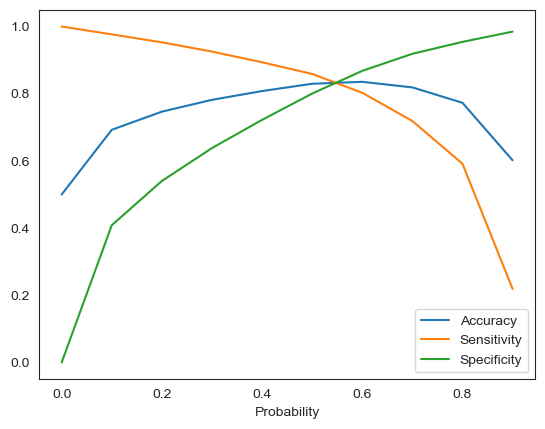

In [90]:
# Plotting accuracy, sensitivity and specificity for various probabilities

sns.set_style("white")
cutoff_df.plot.line(x="Probability", y=["Accuracy","Sensitivity", "Specificity"])
plt.show()

#### As mentioned in the problem statement, it is more important to identify churners than the non-churners accurately. Hence, we'd be prioritising the "Sensitivity" metric so that "Churners" are accurately marked.

#### Inferences-

-  At threshold value 0.6, "Accuracy" metric is stable. Also, there is a good balance among the "Sensitivity" and "Specificity" metrics as well.
-  However, we intend to give more preference to "Sensitivity". And as per the graph, "Sensitivity" decreases with increase in the probability value. Hence, we are going to take 0.5 as the threshold value for higher sensitivity.
-  0.5 is the optimum point to take as a cutoff probability.

In [91]:
# Using 0.5 threshold for predictions

y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_prob,CustomerID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.109698,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.067954,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.026210,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.011775,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.788141,4,1,1,1,1,1,1,1,1,1,0,0,1


In [92]:
# Confusion matrix and Overall Accuracy

confusion_matrix_log_reg_no_pca2 = conf_mat_train(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

Confusion Matrix:
[[17567  4381]
 [ 3098 18850]]
Training Accuracy:  0.8296200109349371


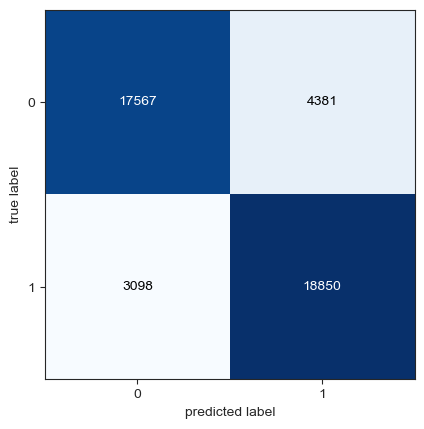

In [93]:
# Plotting confusion matrix

fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix_log_reg_no_pca2)
plt.show()

In [94]:
# Other metrics

other_metrics(confusion_matrix_log_reg_no_pca2)

Sensitivity:  0.858848186622927
Specificity:  0.8003918352469473
False postive rate - Predicting the Churn when the customer hasn't actually Churned:  0.19960816475305268
Positive predictive value:  0.8114157806379407
Negative predictive value:  0.8500846842487297


In [95]:
# Classification report

print(classification_report(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     21948
           1       0.81      0.86      0.83     21948

    accuracy                           0.83     43896
   macro avg       0.83      0.83      0.83     43896
weighted avg       0.83      0.83      0.83     43896



In [96]:
# Calculating Precision and Recall

# Precision = TP / TP + FP

confusion_matrix_log_reg_no_pca2[1,1]/(confusion_matrix_log_reg_no_pca2[0,1]+confusion_matrix_log_reg_no_pca2[1,1])

0.8114157806379407

In [97]:
# Recall = TP / TP + FN

confusion_matrix_log_reg_no_pca2[1,1]/(confusion_matrix_log_reg_no_pca2[1,0]+confusion_matrix_log_reg_no_pca2[1,1])

0.858848186622927

In [98]:
# Using Sci-Kit Learn

precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.8114157806379407

In [99]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.858848186622927

#### Precision and Recall Tradeoff

In [100]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 43891    1
 43892    1
 43893    1
 43894    1
 43895    1
 Name: Churn, Length: 43896, dtype: int32,
 0        0
 1        0
 2        0
 3        0
 4        1
         ..
 43891    1
 43892    1
 43893    1
 43894    1
 43895    1
 Name: predicted, Length: 43896, dtype: int64)

In [101]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

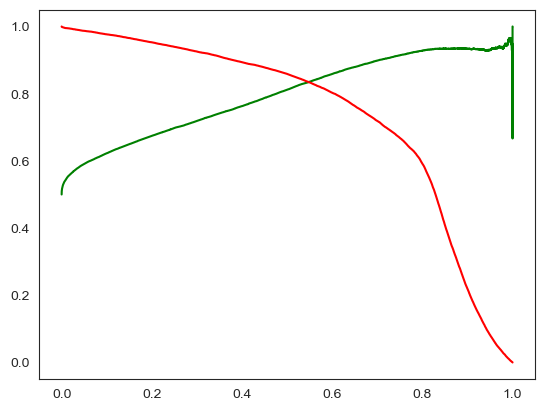

In [102]:
# Plotting precision vs recall for different thresholds

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Inferences-

-  0.5 is the optimum point to take as a cutoff probability.

In [103]:
# Using 0.5 threshold for predictions

y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Churn,Churn_prob,CustomerID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,0,0.109698,0,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0.067954,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.026210,2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.011775,3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.788141,4,1,1,1,1,1,1,1,1,1,0,0,1,1


In [104]:
# Confusion matrix and overall accuracy

confusion_matrix_log_reg_no_pca3 = conf_mat_train(y_train_pred_final.Churn, y_train_pred_final.final_predicted_pr)

Confusion Matrix:
[[17567  4381]
 [ 3098 18850]]
Training Accuracy:  0.8296200109349371


In [105]:
# Other metrics

other_metrics(confusion_matrix_log_reg_no_pca3)

Sensitivity:  0.858848186622927
Specificity:  0.8003918352469473
False postive rate - Predicting the Churn when the customer hasn't actually Churned:  0.19960816475305268
Positive predictive value:  0.8114157806379407
Negative predictive value:  0.8500846842487297


#### Inferences-

-  We will use 0.5 as a cutoff probability for Test Set

#### Making predictions on the Test Set || Building a LogisticRegression Model (Without PCA)

In [106]:
# Getting Final Features

X_test_sm = X_test[rfe_lg_third_iter]

# Adding a constant

X_test_sm = sm.add_constant(X_test_sm)

In [107]:
# Making predictions

y_test_pred = logm3.predict(X_test_sm)

y_test_pred.head()

29360    0.842236
49979    0.643528
90612    0.028415
87007    0.043504
91852    0.004222
dtype: float64

In [108]:
# To convert y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
29360,0.842236
49979,0.643528
90612,0.028415
87007,0.043504
91852,0.004222


In [109]:
# To convert y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [110]:
# Putting Lead ID to index

y_test_df['CustomerID'] = y_test_df.index

In [111]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)

y_test_df.reset_index(drop=True, inplace=True)

In [112]:
# To append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Churn_Flag,CustomerID,0
0,0,29360,0.842236
1,0,49979,0.643528
2,0,90612,0.028415
3,0,87007,0.043504
4,0,91852,0.004222


In [113]:
# Renaming the columns

y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_prob'})

y_pred_final.head()

,Churn_Flag,CustomerID,Churn_prob
0,0,29360,0.842236
1,0,49979,0.643528
2,0,90612,0.028415
3,0,87007,0.043504
4,0,91852,0.004222


In [114]:
# Putting the threshold of 0.5 as derived

y_pred_final['final_predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final.head()

,Churn_Flag,CustomerID,Churn_prob,final_predicted
0,0,29360,0.842236,1
1,0,49979,0.643528,1
2,0,90612,0.028415,0
3,0,87007,0.043504,0
4,0,91852,0.004222,0


In [115]:
# Calculating Area Under The Curve

print("Area under curve: ", metrics.roc_auc_score(y_pred_final.Churn_Flag, y_pred_final.Churn_prob))

Area under curve:  0.8809947487746569


In [116]:
# Confusion matrix and overall accuracy

confusion_test = conf_mat_test(y_pred_final.Churn_Flag, y_pred_final.final_predicted)

Confusion Matrix:
[[4424 1046]
 [  94  439]]
Testing Accuracy:  0.8100949525237381


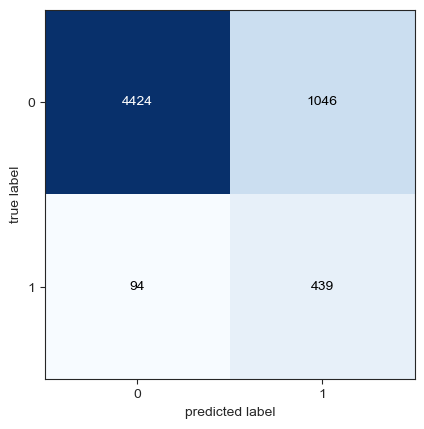

In [117]:
# Plotting confusion matrix

plot_confusion_matrix(conf_mat= confusion_test)
plt.show()

In [118]:
# Other metrics

other_metrics(confusion_test)

Sensitivity:  0.8236397748592871
Specificity:  0.8087751371115174
False postive rate - Predicting the Churn when the customer hasn't actually Churned:  0.19122486288848264
Positive predictive value:  0.2956228956228956
Negative predictive value:  0.9791943337760071


In [119]:
#Classification Report

print(classification_report(y_pred_final.Churn_Flag, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      5470
           1       0.30      0.82      0.44       533

    accuracy                           0.81      6003
   macro avg       0.64      0.82      0.66      6003
weighted avg       0.92      0.81      0.85      6003



In [120]:
# Calculating Precision and Recall

# Precision = TP / TP + FP

confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.2956228956228956

In [121]:
# Recall = TP / TP + FN

confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.8236397748592871

#### Finding out Feature Importance || Building a LogisticRegression Model (Without PCA)

In [122]:
# To display features with corrsponding coefficients in final model

pd.options.display.float_format = '{:.2f}'.format
new_params = logm3.params[1:]
new_params

loc_og_mou_august            -1.05
loc_ic_t2m_mou_july           0.44
total_ic_mou_august          -1.43
total_rech_num_july           0.39
total_rech_num_august        -0.99
total_rech_amt_august        -0.70
last_day_rch_amt_august      -0.44
monthly_2g_june              -0.36
monthly_2g_august            -0.64
monthly_3g_august            -0.72
avg_recharge_amt_june_july    0.88
flag_dec_rech_amt_action     -0.97
dtype: float64

In [123]:
# Relative feature importance

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

loc_og_mou_august            -120.21
loc_ic_t2m_mou_july            50.78
total_ic_mou_august          -163.55
total_rech_num_july            44.35
total_rech_num_august        -112.57
total_rech_amt_august         -79.99
last_day_rch_amt_august       -49.75
monthly_2g_june               -41.10
monthly_2g_august             -73.14
monthly_3g_august             -82.61
avg_recharge_amt_june_july    100.00
flag_dec_rech_amt_action     -110.29
dtype: float64

In [124]:
# To sort features based on importance

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

loc_og_mou_august              2
loc_ic_t2m_mou_july            0
total_ic_mou_august            4
total_rech_num_july           11
total_rech_num_august          9
total_rech_amt_august          5
last_day_rch_amt_august        8
monthly_2g_june                6
monthly_2g_august              7
monthly_3g_august              3
avg_recharge_amt_june_july     1
flag_dec_rech_amt_action      10
dtype: int64

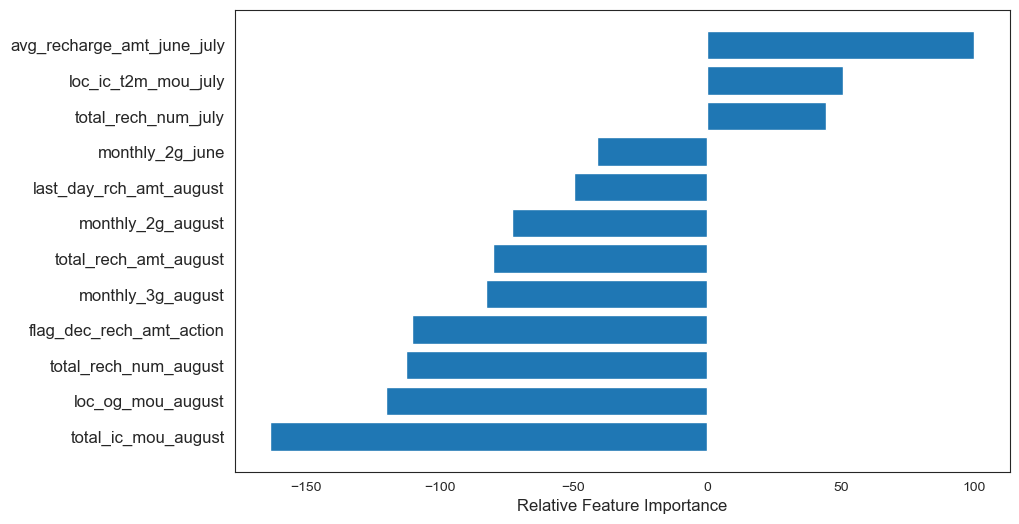

In [125]:
# To plot features with their relative importance

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[rfe_lg_third_iter].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=12) 
plt.show()

#### Features having positive impact on Churn probability in decreasing order of impact:

- avg_recharge_amt_june_july
- loc_ic_t2m_mou_july 
- total_rech_num_july


#### Features having negative impact on Churn probability in decreasing order of impact:

- monthly_2g_june 
- last_day_rch_amt_august
- monthly_2g_august 
- total_rech_amt_august 
- monthly_3g_august 
- flag_dec_rech_amt_action 
- total_rech_num_august
- loc_og_mou_august
- total_ic_mou_august

#### Conclusions || Building a LogisticRegression Model (Without PCA)

#### Evaluation Metrics for the Train Dataset || Building a LogisticRegression Model (Without PCA):

- Accuracy: 0.83
    
- Sensitivity: 0.85
    
- Specificity: 0.80
    
- Precision: 0.81

- Recall: 0.85

- Positive predictive value:  0.81

- Negative predictive value:  0.85

#### Evaluation Metrics for the Test Dataset || Building a LogisticRegression Model (Without PCA):

- Accuracy: 0.81
    
- Sensitivity: 0.82
    
- Specificity: 0.80
    
- Precision: 0.29

- Recall: 0.82

- Positive predictive value:  0.29

- Negative predictive value:  0.97

### b) Modelling with PCA

In [126]:
# Instantiating PCA

pca = PCA(random_state = 100)

In [127]:
# Fit train set on PCA

pca.fit(X_train)

PCA(random_state=100)

In [128]:
# Checking Principal components

pca.components_

array([[ 1.00483285e-01,  1.48339560e-01,  1.79632787e-01, ...,
         1.46294607e-01,  7.29898342e-02, -3.43590966e-02],
       [ 1.08937914e-01,  1.38470889e-01,  1.07243675e-01, ...,
         1.45240693e-01, -7.78557435e-02, -7.00750260e-03],
       [ 1.22432121e-01,  1.58093207e-01,  1.55908159e-01, ...,
         1.69688557e-01,  9.84173201e-03, -1.68357548e-02],
       ...,
       [-7.23064403e-08,  4.81984352e-07,  2.57950752e-07, ...,
        -1.66215551e-05, -5.59920862e-08, -1.42556207e-07],
       [-3.14588117e-07,  4.14974712e-09, -3.68561242e-07, ...,
        -2.72479554e-05,  1.43683189e-09, -5.55240654e-08],
       [ 1.84597265e-07, -1.23419658e-07, -6.07718334e-09, ...,
         9.05411961e-05, -9.42822898e-08, -1.80704215e-07]])

In [129]:
# Cumuliative varinace of the PCs

variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.10340068 0.18308367 0.24056106 0.28378769 0.32441409 0.35938694
 0.39364433 0.42358315 0.45106385 0.47738106 0.50172146 0.52411211
 0.54479545 0.56512004 0.5844855  0.60296314 0.61927914 0.63490796
 0.65033776 0.66542561 0.67947121 0.69312864 0.70553089 0.71651402
 0.72741163 0.73753771 0.74701524 0.75616216 0.76516214 0.77354434
 0.78158014 0.7893926  0.79713599 0.80461846 0.81201419 0.81925935
 0.8260225  0.83260829 0.83891107 0.84509792 0.85089388 0.85656252
 0.86205761 0.86745789 0.87274828 0.8776995  0.88248312 0.88718557
 0.89181827 0.89623666 0.90052942 0.90457555 0.90835605 0.91203979
 0.91557771 0.91907751 0.92246767 0.92582168 0.92902467 0.93205919
 0.935013   0.93792215 0.94075133 0.94353523 0.94630688 0.9490166
 0.95168052 0.95422639 0.95659822 0.95892285 0.96120307 0.9634311
 0.96561079 0.96763291 0.96962802 0.97157296 0.97341797 0.9752538
 0.97702323 0.97872406 0.98042253 0.98206496 0.98366337 0.98522741
 0.98672236 0.98819073 0.98952836 0.9907957  0.99199249 0.9930412

Text(0, 0.5, 'Cumulative Variance')

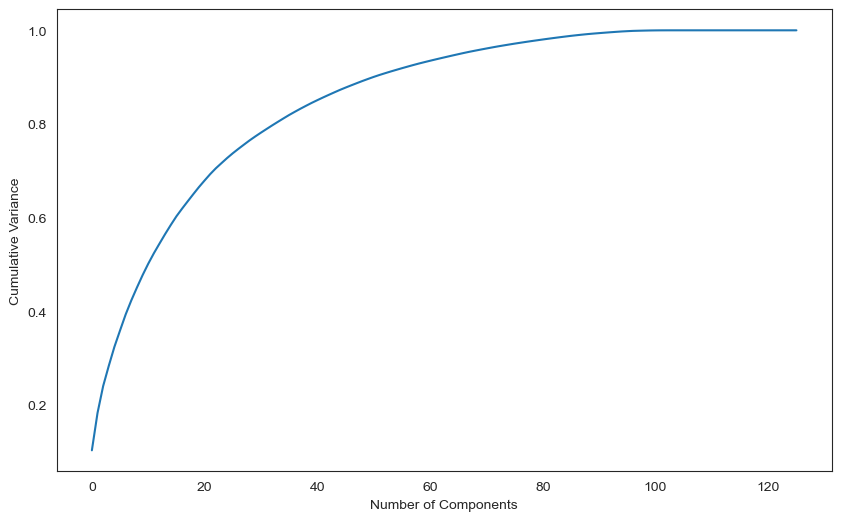

In [130]:
# Plotting a scree plot

fig = plt.figure(figsize = (10, 6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

#### *Inference: Since "60 Components" explain almost 90% of the data, we will perform PCA with "60 Components".*

In [131]:
# Instantiating PCA with 60 components

pca_final = IncrementalPCA(n_components=60)

#### *Note: Scaling the Train Dataset using "fit_transform"*

In [132]:
# Fit and transform the X_train
# Applying the "fit_transform" to fit the data into scaler and transform as well

X_train_pca = pca_final.fit_transform(X_train)

#### *Note: Scaling the Test Dataset using "transform" only as we don't "fit" on the Test Dataset*

In [133]:
# Applying the "transform" only on the test dataset

X_test_pca = pca_final.transform(X_test)

#### Approach: Preferred Metrics are "Sensitivity" and "Recall"

Reason: Our main focus is to identify the **"Churn"** cases properly and not the "Non-Churn" cases.

The mail goal for the business is to retain the customers that are going to "Churn". Hence, even if we wrongly predict the "Non-Churn" customers as "Churn" and provide them with incentives in order to retain them, it wouldn't be a problem.

#### i) Model- Logistic Regression (Using PCA)

#### Tuning Hyperparameter C

In [134]:
# Creating KFold object with 5 splits

folds = KFold(n_splits = 5, shuffle=True, random_state = 4)

# Specify params

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifying score as recall as we are more focused on acheiving the higher sensitivity than the accuracy

model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model

model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [135]:
# results of grid search CV

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.09,0.02,0.01,0.01,0.01,{'C': 0.01},0.85,0.86,0.86,0.85,0.86,0.86,0.00,6,0.86,0.86,0.86,0.86,0.86,0.86,0.00
1,0.12,0.02,0.01,0.01,0.10,{'C': 0.1},0.86,0.86,0.86,0.85,0.86,0.86,0.00,5,0.86,0.86,0.86,0.86,0.86,0.86,0.00
2,0.12,0.01,0.01,0.01,1,{'C': 1},0.86,0.86,0.86,0.85,0.86,0.86,0.00,4,0.86,0.86,0.86,0.86,0.86,0.86,0.00
3,0.11,0.00,0.00,0.00,10,{'C': 10},0.86,0.86,0.86,0.85,0.86,0.86,0.00,1,0.86,0.86,0.86,0.86,0.86,0.86,0.00
4,0.12,0.04,0.01,0.01,100,{'C': 100},0.86,0.86,0.86,0.85,0.86,0.86,0.00,1,0.86,0.86,0.86,0.86,0.86,0.86,0.00
5,0.11,0.02,0.00,0.01,1000,{'C': 1000},0.86,0.86,0.86,0.85,0.86,0.86,0.00,1,0.86,0.86,0.86,0.86,0.86,0.86,0.00


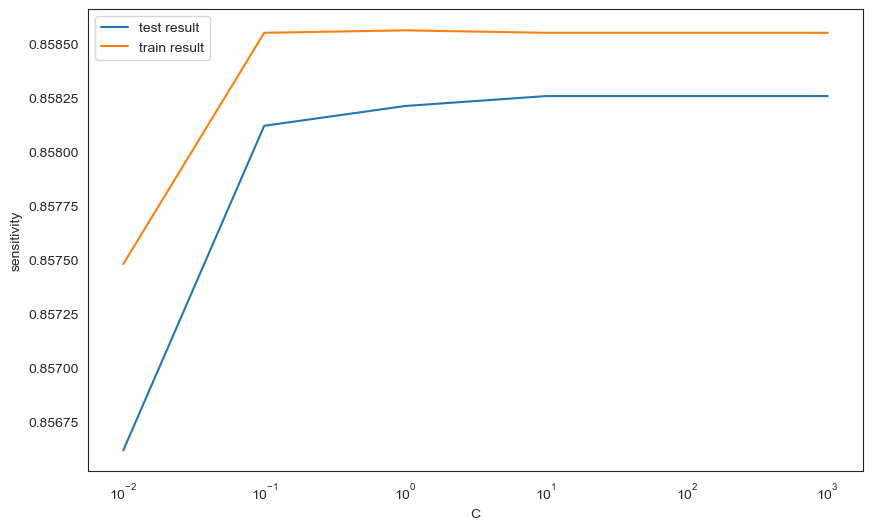

In [136]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [137]:
# Best score with best C

best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8582588472483657 at C = 10


#### Building a LogisticRegression Model (With PCA) || Model (i)

In [138]:
# Instantiating the model with best C

logistic_pca = LogisticRegression(C = best_C)

# Fit the model on the train set

log_pca_model = logistic_pca.fit(X_train_pca, y_train)

#### Building a LogisticRegression Model (With PCA) || Prediction on Train Dataset

In [139]:
# Predictions on the Train set

y_train_pred = log_pca_model.predict(X_train_pca)

In [140]:
# Confusion matrix

confusion_lr_pca_train = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_lr_pca_train)

[[17951  3997]
 [ 3097 18851]]


In [141]:
TP = confusion_lr_pca_train[1,1] # true positive 
TN = confusion_lr_pca_train[0,0] # true negatives
FP = confusion_lr_pca_train[0,1] # false positives
FN = confusion_lr_pca_train[1,0] # false negatives

In [142]:
# Accuracy Metric for Train Set

print("----- Accuracy Metrics for Train Set || LogisticRegression Model (With PCA) -----")

print("")

print("Accuracy: ", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity Metric 

print("Sensitivity: ",TP / float(TP+FN))

# Specificity Metric

print("Specificity: ", TN / float(TN+FP))

----- Accuracy Metrics for Train Set || LogisticRegression Model (With PCA) -----

Accuracy:  0.8383907417532349
Sensitivity:  0.858893748860944
Specificity:  0.8178877346455258


#### Building a LogisticRegression Model (With PCA) || Prediction on Test Dataset

In [143]:
# Prediction on the Test set

y_test_pred = log_pca_model.predict(X_test_pca)

In [144]:
# Confusion matrix

confusion_lr_pca_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_lr_pca_test)

[[4506  964]
 [  85  448]]


In [145]:
# Calculating Metrics

TP = confusion_lr_pca_test[1,1] # true positive 
TN = confusion_lr_pca_test[0,0] # true negatives
FP = confusion_lr_pca_test[0,1] # false positives
FN = confusion_lr_pca_test[1,0] # false negatives

In [146]:
# Accuracy Metric for Test Set

print("----- Accuracy Metrics for Test Set || LogisticRegression Model (With PCA) -----")

print("")

print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity Metric

print("Sensitivity:" ,TP / float(TP+FN))

# Specificity Metric

print("Specificity:", TN / float(TN+FP))

----- Accuracy Metrics for Test Set || LogisticRegression Model (With PCA) -----

Accuracy: 0.8252540396468433
Sensitivity: 0.8405253283302064
Specificity: 0.8237659963436929


#### Conclusions || Building a LogisticRegression Model (With PCA)

#### Evaluation Metrics for the Train Dataset || Building a LogisticRegression Model (With PCA):

- Accuracy: 0.83
    
- Sensitivity: 0.85
    
- Specificity: 0.81

#### Evaluation Metrics for the Test Dataset || Building a LogisticRegression Model (With PCA):

- Accuracy: 0.82
    
- Sensitivity: 0.84
    
- Specificity: 0.82

#### Inference: 

Logistic Regression Model (With PCA) has a better Testing Accuracy (0.82) and Sensitivity (0.84) compared to the Logistic Regression (Without PCA) with a Testing Accuracy (0.81) and Sensitivity (0.82)

#### ii) Model- Random Forest (Using PCA)

#### Tuning Hyperparameter

In [147]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}

# Create a base model

rf = RandomForestClassifier()


# Instantiating the grid search model

grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)


# Fit the model

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [148]:
# Printing the optimal accuracy score and hyperparameters

print('We can get an accuracy of', grid_search.best_score_, 'using', grid_search.best_params_)

We can get an accuracy of 0.8304856934572626 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 100, 'n_estimators': 100}


#### Model with Optimal Hyperparameters

In [149]:
# Model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=300)

In [150]:
# Fitting the Random Forest model

rfc_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=300)

#### Building a Random Forest Model (With PCA) || Prediction on Train Dataset

In [151]:
# Predictions on the Train Dataset

y_train_pred = rfc_model.predict(X_train_pca)

In [152]:
# Confusion matrix

confusion_rf_pca_train = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_rf_pca_train)

[[19058  2890]
 [ 4314 17634]]


In [153]:
# Calculating Metrics

TP = confusion_rf_pca_train[1,1] # true positive 
TN = confusion_rf_pca_train[0,0] # true negatives
FP = confusion_rf_pca_train[0,1] # false positives
FN = confusion_rf_pca_train[1,0] # false negatives

In [154]:
# Accuracy Metric for Train Set

print("----- Accuracy Metrics for Train Set || Random Forest Model (With PCA) -----")

print("")

# Accuracy Metric

print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity Metric

print("Sensitivity:",TP / float(TP+FN))

# Specificity Metric

print("Specificity:", TN / float(TN+FP))

----- Accuracy Metrics for Train Set || Random Forest Model (With PCA) -----

Accuracy: 0.8358848186622927
Sensitivity: 0.8034445051940952
Specificity: 0.8683251321304902


#### Building a Random Forest Model (With PCA) || Prediction on Test Dataset

In [155]:
# Prediction on the test set

y_test_pred = rfc_model.predict(X_test_pca)

In [156]:
# Confusion matrix

confusion_rf_pca_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_rf_pca_test)

[[4762  708]
 [ 138  395]]


In [157]:
# Calculating Metrics

TP = confusion_rf_pca_test[1,1] # true positive 
TN = confusion_rf_pca_test[0,0] # true negatives
FP = confusion_rf_pca_test[0,1] # false positives
FN = confusion_rf_pca_test[1,0] # false negatives

In [158]:
# Accuracy Metric for Test Set

print("----- Accuracy Metrics for Test Set || Random Forest Model (With PCA) -----")

print("")

# Accuracy Metric

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity Metric

print("Sensitivity:",TP / float(TP+FN))

# Specificity Metric

print("Specificity:", TN / float(TN+FP))

----- Accuracy Metrics for Test Set || Random Forest Model (With PCA) -----

Accuracy: 0.8590704647676162
Sensitivity: 0.7410881801125704
Specificity: 0.8705667276051189


#### Conclusions || Building a Random Forest Model (With PCA)

#### Evaluation Metrics for the Train Dataset || Building a Random Forest Model (With PCA):

- Accuracy: 0.83
    
- Sensitivity: 0.80
    
- Specificity: 0.86

#### Evaluation Metrics for the Test Dataset || Building a Random Forest Model (With PCA):

- Accuracy: 0.85
    
- Sensitivity: 0.74
    
- Specificity: 0.87

#### Inferences on the Training Dataset: 

- Random Forest Model (With PCA) with a Testing Accuracy (0.85) has performed better than the Logistic Regression Model (With PCA) with a Testing Accuracy (0.82)

- Logistic Regression Model (With PCA) has a better Sensitivity (0.84) compared to the Random Forest Model (With PCA) with a Sensitivity (0.74)

- As we're prioritising Sensitivity over Accuracy, we will choose Logistic Regression Model (With PCA).

#### iii) Model- Decision Tree (Using PCA)

#### Tuning Hyperparameter

In [159]:
# Create the parameter grid 

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiating the grid search model

dtree = DecisionTreeClassifier()

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [160]:
# cv results

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.16,0.01,0.01,0.01,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.73,0.75,0.76,0.78,0.74,0.75,0.02,5
1,1.16,0.01,0.01,0.01,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.73,0.75,0.76,0.78,0.74,0.75,0.02,5
2,1.16,0.01,0.01,0.01,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.73,0.75,0.76,0.77,0.74,0.75,0.02,7
3,1.16,0.01,0.00,0.01,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.73,0.75,0.76,0.77,0.74,0.75,0.02,7
4,1.97,0.02,0.00,0.01,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.79,0.83,0.84,0.86,0.81,0.83,0.02,2
5,2.01,0.04,0.00,0.01,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.79,0.83,0.84,0.86,0.81,0.83,0.02,1
6,1.93,0.04,0.02,0.00,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.78,0.83,0.84,0.85,0.82,0.82,0.02,4
7,1.98,0.04,0.01,0.01,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.78,0.83,0.84,0.85,0.82,0.82,0.02,3


In [161]:
# Printing the optimal sensitivity score and hyperparameters

print("Best sensitivity: ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:  0.8254518466387546
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


#### Model with Optimal Hyperparameters

In [162]:
# Model with optimal hyperparameters

dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

# Fitting the Decision Tree model

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Building a Decision Tree Model (With PCA) || Prediction on Train Dataset

In [163]:
# Predictions on the train set

y_train_pred = dt_pca_model.predict(X_train_pca)

In [164]:
# Confusion matrix

confusion_dt_pca_train = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_dt_pca_train)

[[18927  3021]
 [ 3054 18894]]


In [165]:
# Calculating Metrics

TP = confusion_dt_pca_train[1,1] # true positive 
TN = confusion_dt_pca_train[0,0] # true negatives
FP = confusion_dt_pca_train[0,1] # false positives
FN = confusion_dt_pca_train[1,0] # false negatives

In [166]:
# Accuracy Metric for Train Set

print("----- Accuracy Metrics for Train Set || Decision Tree Model (With PCA) -----")

print("")

# Accuracy Metric

print("Accuracy:", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity Metric

print("Sensitivity:", TP / float(TP+FN))

# Specificity Metric

print("Specificity:", TN / float(TN+FP))

----- Accuracy Metrics for Train Set || Decision Tree Model (With PCA) -----

Accuracy: 0.8616047020229634
Sensitivity: 0.8608529250956807
Specificity: 0.862356478950246


#### Building a Decision Tree Model (With PCA) || Prediction on Test Dataset

In [167]:
#### Building a Random Forest Model (With PCA) || Prediction on Test Dataset

In [168]:
# Prediction on the test set

y_test_pred = dt_pca_model.predict(X_test_pca)

In [169]:
# Confusion matrix

confusion_dt_pca_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_dt_pca_test)

[[4630  840]
 [ 159  374]]


In [170]:
# Calculating Metrics

TP = confusion_dt_pca_test[1,1] # true positive 
TN = confusion_dt_pca_test[0,0] # true negatives
FP = confusion_dt_pca_test[0,1] # false positives
FN = confusion_dt_pca_test[1,0] # false negatives

In [171]:
# Accuracy Metric for Test Set

print("----- Accuracy Metrics for Test Set || Decision Tree Model (With PCA) -----")

print("")

# Accuracy Metric

print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity Metric

print("Sensitivity:", TP / float(TP+FN))

# Specificity Metric

print("Specificity:", TN / float(TN+FP))

----- Accuracy Metrics for Test Set || Decision Tree Model (With PCA) -----

Accuracy: 0.8335832083958021
Sensitivity: 0.701688555347092
Specificity: 0.8464351005484461


#### Conclusions || Building a Decision Tree Model (With PCA)

#### Evaluation Metrics for the Train Dataset || Building a Decision Tree Model (With PCA):

- Accuracy: 0.86
    
- Sensitivity: 0.86
    
- Specificity: 0.86

#### Evaluation Metrics for the Test Dataset || Building a Decision Tree Model (With PCA):

- Accuracy: 0.83
    
- Sensitivity: 0.70
    
- Specificity: 0.84

#### Inferences on Training Dataset: 

- Decision Tree Model (With PCA) with a Testing Accuracy (0.83) has performed better than the Logistic Regression Model (With PCA) with a Testing Accuracy (0.82)

- Logistic Regression Model (With PCA) has a better Sensitivity (0.84) compared to the Decision Tree Model (With PCA) with a Sensitivity (0.70)

- As we're prioritising Sensitivity over Accuracy, we will choose Logistic Regression Model (With PCA).

## Step 6: Model Comparisons

### a) Modelling without PCA

#### Evaluation Metrics for the Test Dataset || Building a LogisticRegression Model (Without PCA):

Accuracy: 0.81

Sensitivity: 0.82

Specificity: 0.80

Precision: 0.29

Recall: 0.82

### b) Modelling with PCA

####  ----- Accuracy Metrics for Test Set || LogisticRegression Model (With PCA) -----

- Accuracy: 0.82
- Sensitivity: 0.84
- Specificity: 0.82


####  ----- Accuracy Metrics for Test Set || Random Forest Model (With PCA) -----

- Accuracy: 0.85
- Sensitivity: 0.74
- Specificity: 0.87

#### ----- Accuracy Metrics for Test Set || Decision Tree Model (With PCA) -----

- Accuracy: 0.83
- Sensitivity: 0.70
- Specificity: 0.84

#### Modelling with PCA Model Preference

- As we're prioritising Sensitivity over Accuracy, we will choose Logistic Regression Model (With PCA).
- Reason:
    - Sensitivity Metric: LogisticRegression Model (0.84) > Random Forest Model (0.74) > Decision Tree Model (0.70)

## Step 6: Final Conclusions

- Conclusion 1 : LogisticRegression Model (With PCA) has a better Training Accuracy (0.82) and Sensitivity (0.84) compared to the LogisticRegression Model (Without PCA) with a Training Accuracy (0.81) and Sensitivity (0.82)

- ----------------------------------------------------------------------------------------------------------------------------

- Conclusion 2 : As per the problem statement, the main objective of identifying important predictor attributes which help the business understand indicators of churn. Hence, we will go with **"Modelling without PCA"** as it expliains the important predictor variables as well as the significance of each variable.

## Step 7: Business Recommendations

#### Top Predictiors

| Variables   | Coefficients |
|---------------------|--------------|
avg_recharge_amt_june_july|0.88|
loc_ic_t2m_mou_july|0.44|
total_rech_num_july|0.39|
monthly_2g_june|-0.36|
last_day_rch_amt_august|-0.44|
monthly_2g_august|-0.64|
total_rech_amt_august|-0.70|
monthly_3g_august|-0.72|
flag_dec_rech_amt_action|-0.97|
total_rech_num_august|-0.99|
loc_og_mou_august|-1.05|
total_ic_mou_august|-1.43|

- Note: (+) sign indicates a direct relationship with the Churn probability whereas (-) signs implies inverse relationship with the Churn Probability.

### **Recommendations**

1. Focus on the customers who have a high average Recharge amount in "Good Phase" as there's a higher probability for such customers to Churn.

2. Customers having increasing incoming local minutes of usage for operators T to other operator mobiles for the month of July are more likely to churn.

3. Customers who are frequently doing recharges of higher amounts in the month of July are more likely to churn.

4. Customers who have recharges of lesser amount in the the month of August are more likely to churn.

5. Cutomers, whose monthly 2G/3G recharges in the month of August is high, are more likely to be churn.

6. Customers having decreasing total outgoing minutes of voice calls in the month of August are more likely to churn.

7. Customers having decreasing local outgoing voice calls in the month of August are more likely to churn.

8. Customers for which the recharge amount has been decreasing in the "Action Phase" are more likely to churn.